<a href="https://colab.research.google.com/github/Monsurat-Onabajo/DeepLearning_projects/blob/main/CiFA10_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 33.1 MB/s eta 0:00:00


In [2]:
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch
from torch import nn
from PIL import Image
import numpy as np
from torch.utils.data.dataloader import DataLoader
from torchmetrics import Accuracy
from tqdm.auto import tqdm 
from pathlib import Path
import requests
from torchvision.transforms import AutoAugment, AutoAugmentPolicy

In [3]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# Data Analysis

* Downloading and exploring of data
* Creating helper functions for data visualization to reduce code repetition

In [4]:
!nvidia-smi

Mon May  1 15:54:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Transform data 
train_transform= transforms.Compose([transforms.AutoAugment(policy=AutoAugmentPolicy.CIFAR10),
                                     transforms.RandomHorizontalFlip(p=0.5),                                    
                                     transforms.ToTensor(),                                                                 
                                      ])

test_transform= transforms.Compose([transforms.ToTensor()])

In [6]:
train_data= torchvision.datasets.CIFAR10(root= 'cifa_dataset', 
                                         train= True,
                                         transform=train_transform,
                                         download= True,
                                         target_transform=None)
test_data= torchvision.datasets.CIFAR10(root= 'cifa_dataset_test',
                                        train= False,
                                        transform=test_transform,
                                        download= True,
                                        target_transform=None)

100%|██████████| 170498071/170498071 [00:12<00:00, 13264588.63it/s]


Extracting cifa_dataset/cifar-10-python.tar.gz to cifa_dataset


100%|██████████| 170498071/170498071 [00:13<00:00, 12916035.01it/s]


Extracting cifa_dataset_test/cifar-10-python.tar.gz to cifa_dataset_test


In [7]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifa_dataset_test
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [8]:
train_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifa_dataset
    Split: Train
    StandardTransform
Transform: Compose(
               AutoAugment(policy=AutoAugmentPolicy.CIFAR10, fill=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [9]:
len(train_data), len(test_data)

(50000, 10000)

In [10]:
dir(train_data)

['__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__orig_bases__',
 '__parameters__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_integrity',
 '_format_transform_repr',
 '_is_protocol',
 '_load_meta',
 '_repr_indent',
 'base_folder',
 'class_to_idx',
 'classes',
 'data',
 'download',
 'extra_repr',
 'filename',
 'meta',
 'root',
 'target_transform',
 'targets',
 'test_list',
 'tgz_md5',
 'train',
 'train_list',
 'transform',
 'transforms',
 'url']

In [11]:
train_data.data.shape

(50000, 32, 32, 3)

In [12]:
test_data.data.shape

(10000, 32, 32, 3)

In [13]:
train_data.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [14]:
train_data.targets[: 10]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

In [15]:
class_names= train_data.classes

In [16]:
def show_image(image_data, class_names, class_preds = None):
  """
  this functions takes in 9 batches of array of numbers in height, weight and color format functions
  and returns a 3 by 3 visualization of the data

  args
  ----
  image_data: (array) arrays of numbers in height, weight and color format 
  class_names: (list) class names of the data
  class_preds: (Optional) if available, The Target name that the model predicted
  smooth:(Boolean) either pixelated or smooth version of the dataset
  """

  classes_names= train_data.classes
  fig= plt.figure(figsize=(9,9))
  rows, cols=3,3
  for i in range(1, rows*cols+1):
    img= image_data[i]
    label= classes_names[class_names[i]]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img,
               #interpolation= 'spline16',
               interpolation_stage='rgba')

    if class_preds is None:
      plt.title(label)
    else:
      pred= classes_names[class_preds[i]]
      title_text= f'Truth:{label} | Pred:{pred}'
      if label==pred:
        plt.title(title_text, fontsize=10, c='g') 
      else:
        plt.title(title_text, fontsize=10, c='r')
  
    plt.axis(False)
  

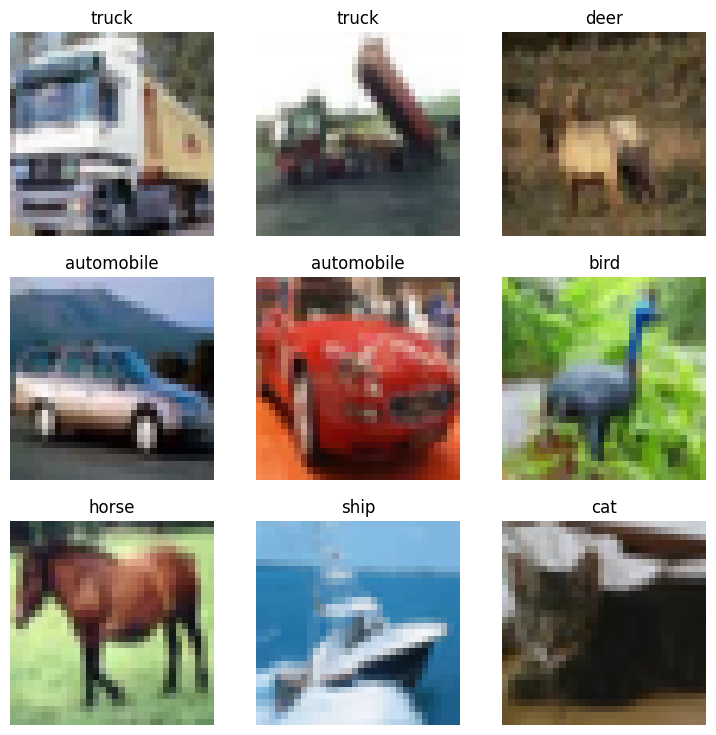

In [17]:
show_image(image_data=train_data.data[: 10], class_names= train_data.targets[: 10])

### Getting our data ready
* Create a batch size of 32

In [18]:
img, label= train_data[0]
img.shape, label

(torch.Size([3, 32, 32]), 6)

In [19]:
img.dtype

torch.float32

In [20]:
train_dataloader= DataLoader(dataset= train_data,
                             batch_size= 32,
                             shuffle= True,
                             )

test_dataloader= DataLoader(dataset=test_data,
                            batch_size=32,
                            shuffle=True,                           
                            )

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f03d4a2c580>,
 <torch.utils.data.dataloader.DataLoader at 0x7f03d4a2e0b0>)

In [21]:
len(train_dataloader), len(test_dataloader)

(1563, 313)

### Exploring the data in batches

In [22]:
train_feature_batch, train_label_batch= next(iter(train_dataloader))
train_feature_batch.shape, train_label_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

In [23]:
# Pytorch takes in shape image in [batch_size, color, height, weight] but matplotlib takes in image in [batch_size, height, weight, color ] 
# It has to be reshape into [batch_size, height, weight, color ] before it can be plotted out
train_feature_batch[: 9].shape

torch.Size([9, 3, 32, 32])

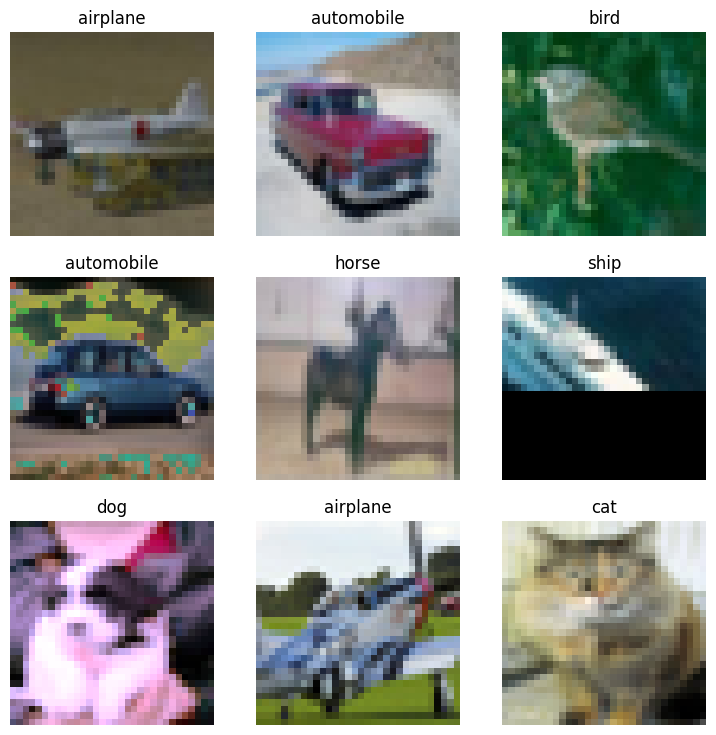

In [24]:
show_image(image_data=train_feature_batch[: 10].permute(0,2,3,1), class_names= train_label_batch[: 10])

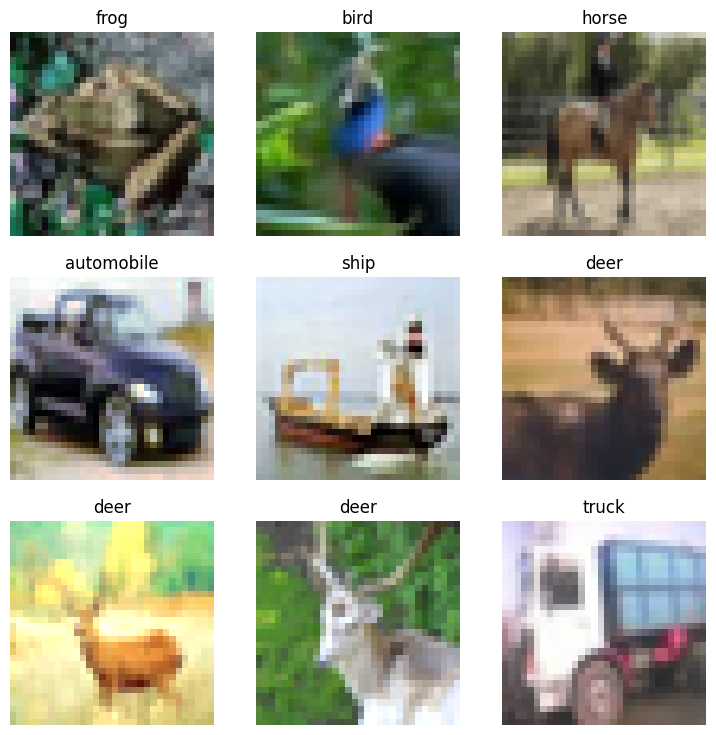

In [25]:
show_image(image_data=train_feature_batch[10: 20].permute(0,2,3,1), class_names= train_label_batch[10:20])

### Creating a Baseline Model

The data has been transformed sucessfully and i can now build a baseline model

In [26]:
class BaselineModel(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer= nn.Sequential(
        nn.Conv2d(in_channels= input_shape,# in_channels = no of channels in visual data. it is usually input shape
                  out_channels= hidden_units,
                  kernel_size= 3,
                  stride=1,
                  padding=1),
        nn.MaxPool2d(kernel_size=2)
        )
    self.classifier= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units*16*16, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_shape)
    )
  def forward(self, x):
    x= self.layer(x)
    #print (x.shape)
    x= self.classifier(x)
    return (x)

torch.manual_seed(42)
model= BaselineModel(input_shape= 3,
                     hidden_units=200,
                     output_shape= len(class_names)).to(device)
model

BaselineModel(
  (layer): Sequential(
    (0): Conv2d(3, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=51200, out_features=200, bias=True)
    (2): ReLU()
    (3): Linear(in_features=200, out_features=10, bias=True)
  )
)

### Test model on dummy data

In [27]:
dummy_x= torch.rand(size= [1,3,32,32])
dummy_x.shape

torch.Size([1, 3, 32, 32])

In [28]:
model(dummy_x.to(device))

tensor([[ 0.0811, -0.0460, -0.0285, -0.0741, -0.0017, -0.0647, -0.1179, -0.3091,
          0.0141, -0.0028]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Creating training function

In [29]:
def training_loop(model, dataloader, accuracy_fn, loss_fn, device, optimizer):
  '''
  args
  -----
  model: torch model architecture
  epochs: [int] number of epochs
  dataloader:[torch.tensor] data in batches
  accuracy_fn: accuracy function 
  loss_fn: loss function
  device: either cpu or cuda
  optimizer: optimizer function

  returns accuracy and loss function metrics of the trained data
  '''
  train_loss=0
  train_acc=0
  model.train()
  for batch, (X,y) in enumerate(dataloader):
    X, y= X.to(device), y.to(device)
    y_logits= model(X)
    loss = loss_fn(y_logits, y)
    train_loss += loss.item()
    train_acc += accuracy_fn(y, y_logits.argmax(dim=1)).item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  
  return train_loss, train_acc
  #  print(f'Train loss: {train_loss:.3f} | accuracy: {train_acc:.4f}')

In [30]:
def test_loop(model: torch.nn.Module,dataloader, accuracy_fn, loss_fn, device):
  '''
  args
  -----
  model: torch model architecture
  epochs: [int] number of epochs
  dataloader:[torch.tensor] data in batches
  accuracy_fn: accuracy function 
  loss_fn: loss function
  device: either cpu or cuda

  returns accuracy and loss function metrics of the test data
  '''

  
  test_loss=0
  test_acc=0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X, y= X.to(device), y.to(device)
      y_pred= model(X)
      loss= loss_fn(y_pred, y)
      test_loss += loss.item()
      test_acc += accuracy_fn(y, y_pred.argmax(dim=1)).item()
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    
    return test_loss, test_acc
    #print (f'test loss: {test_loss:.3f}| test accuracy {test_acc:.4f}')
  


In [31]:
def training_function(model, optimizer, train_dataloader, test_dataloader, accuracy_fn, loss_fn, device, epochs):
  '''
  args
  -----
  model: torch model architecture
  epochs: [int] number of epochs
  train_dataloader: trained data in batches
  test_dataloader: test data in batches
  accuracy_fn: accuracy function 
  loss_fn: loss function
  device: either cpu or cuda
  optimizer: optimizer function

  returns accuracy and loss function metrics of the trained and test data
  '''

  result= {'train_loss': [],
          'train_Acc': [],
          'test_loss': [],
          'test_Acc':[]}
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc= training_loop(model=model, 
                                         dataloader= train_dataloader, 
                                         accuracy_fn= accuracy_fn,
                                         loss_fn= loss_fn, 
                                         device= device,
                                         optimizer= optimizer)
    test_loss, test_acc= test_loop(model= model, dataloader=test_dataloader, accuracy_fn=accuracy_fn, loss_fn= loss_fn, device=device)

    print (f'Epochs: {epoch} | train loss {train_loss:.4f} | Train acc: {train_acc:.4f} |test_loss {test_loss:.4f}| test acc {test_acc:.4f}')

    result['train_loss'].append(train_loss)
    result['test_loss'].append(test_loss)
    result['train_Acc'].append(train_acc)
    result['test_Acc'].append(test_acc)

  return result

In [32]:
accuracy= Accuracy(task= 'multiclass', num_classes= 10).to(device)
loss_fn= nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(), lr=0.001)

In [33]:
model_result= training_function(model=model, 
                  epochs=10, 
                  train_dataloader= train_dataloader,
                  test_dataloader= test_dataloader,
                  accuracy_fn= accuracy,
                  loss_fn= loss_fn, 
                  device= device,
                  optimizer= optimizer)

  0%|          | 0/10 [00:00<?, ?it/s]

Epochs: 0 | train loss 1.8662 | Train acc: 0.3457 |test_loss 1.4439| test acc 0.4880
Epochs: 1 | train loss 1.6053 | Train acc: 0.4323 |test_loss 1.2774| test acc 0.5516
Epochs: 2 | train loss 1.4958 | Train acc: 0.4738 |test_loss 1.2165| test acc 0.5659
Epochs: 3 | train loss 1.4362 | Train acc: 0.4987 |test_loss 1.2333| test acc 0.5677
Epochs: 4 | train loss 1.3849 | Train acc: 0.5158 |test_loss 1.1550| test acc 0.5995
Epochs: 5 | train loss 1.3534 | Train acc: 0.5301 |test_loss 1.1774| test acc 0.5970
Epochs: 6 | train loss 1.3233 | Train acc: 0.5396 |test_loss 1.1355| test acc 0.6082
Epochs: 7 | train loss 1.3051 | Train acc: 0.5450 |test_loss 1.0804| test acc 0.6280
Epochs: 8 | train loss 1.2905 | Train acc: 0.5519 |test_loss 1.1240| test acc 0.5983
Epochs: 9 | train loss 1.2721 | Train acc: 0.5581 |test_loss 1.0942| test acc 0.6239


In [51]:
model_result

{'train_loss': [1.8662200984631452,
  1.605332198695197,
  1.4957869000260982,
  1.4361508279295205,
  1.3848933267120513,
  1.3534018844270737,
  1.3233225298324458,
  1.3050968261460654,
  1.2904848821332495,
  1.2721224498535224],
 'train_Acc': [0.3457093730006398,
  0.43230166346769033,
  0.4738283749200256,
  0.49872040946896995,
  0.5158349328214972,
  0.5301303582853487,
  0.5396473128598849,
  0.5450455854126679,
  0.5519233845169546,
  0.5581413947536789],
 'test_loss': [1.4439053851575516,
  1.2774419529369463,
  1.2164713357584165,
  1.2333128151421349,
  1.1550325001009738,
  1.1774435389917879,
  1.1355045862472095,
  1.0803921034160895,
  1.123976038096431,
  1.0941501069373596],
 'test_Acc': [0.48801916932907347,
  0.551617412140575,
  0.5658945686900958,
  0.5676916932907349,
  0.5995407348242812,
  0.5970447284345048,
  0.6082268370607029,
  0.6279952076677316,
  0.5983426517571885,
  0.6239017571884984]}

In [35]:
class TinyVGGModel(nn.Module):
  '''
  Model architecture that replicates the tinyVGG model from
  CNN explainer website.
  '''
  def __init__(self, input_shape: int, hidden_shape: int, output_shape:int):
    super().__init__()
    self.conv_block= nn.Sequential(
        nn.Conv2d(in_channels= input_shape,# in_channels = no of channels in visual data. it is usually input shape
                  out_channels= hidden_shape,
                  kernel_size= 3,
                  stride=1,
                  padding=1),

        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    
    self.conv_block_2= nn.Sequential(
        nn.Conv2d(in_channels= hidden_shape,
                  out_channels=hidden_shape,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_shape,
                  out_channels= hidden_shape,
                  kernel_size= 3,
                  padding=1,
                  stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    
  
    self.classifier_layer= nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_shape*8*8, out_features= hidden_shape),
        nn.ReLU(),
        nn.Linear(in_features=hidden_shape, out_features= output_shape)
    )
  
  def forward(self, x):
    x= self.conv_block(x)
    #print (f'Output of conv_block layer {x.shape}')
    x= self.conv_block_2(x)
    #print (f'Output of conv_block_2 layer {x.shape}')
    x= self.classifier_layer(x)
    #print (f'Output of classifier layer {x.shape}')
    return x



In [36]:
torch.manual_seed(42)
# input data have only one color chanel 
model_conv= TinyVGGModel(input_shape=3,
                               hidden_shape=250,
                               output_shape=len(class_names)).to(device)                              

In [37]:
dummy_x= torch.rand(size= [1,3,32,32]).to(device)
model_conv(dummy_x)

tensor([[-0.0523,  0.0374,  0.0392,  0.0501,  0.0296, -0.0034, -0.0261, -0.0423,
          0.0069, -0.0528]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [38]:
optimizer_conv= torch.optim.SGD(model_conv.parameters(), lr=0.1)

In [39]:
model_conv_result= training_function(model=model_conv, 
                  epochs=9, 
                  train_dataloader= train_dataloader,
                  test_dataloader= test_dataloader,
                  accuracy_fn= accuracy,
                  loss_fn= loss_fn, 
                  device= device,
                  optimizer= optimizer_conv)
                  

  0%|          | 0/9 [00:00<?, ?it/s]

Epochs: 0 | train loss 2.0280 | Train acc: 0.2569 |test_loss 1.7100| test acc 0.3691
Epochs: 1 | train loss 1.4638 | Train acc: 0.4781 |test_loss 1.0519| test acc 0.6419
Epochs: 2 | train loss 1.1440 | Train acc: 0.5956 |test_loss 1.1161| test acc 0.6025
Epochs: 3 | train loss 0.9866 | Train acc: 0.6547 |test_loss 0.7392| test acc 0.7422
Epochs: 4 | train loss 0.8695 | Train acc: 0.6951 |test_loss 0.7546| test acc 0.7334
Epochs: 5 | train loss 0.7791 | Train acc: 0.7305 |test_loss 0.6035| test acc 0.7900
Epochs: 6 | train loss 0.7161 | Train acc: 0.7498 |test_loss 0.6427| test acc 0.7824
Epochs: 7 | train loss 0.6652 | Train acc: 0.7717 |test_loss 0.5672| test acc 0.8091
Epochs: 8 | train loss 0.6069 | Train acc: 0.7909 |test_loss 0.5849| test acc 0.8105


In [40]:
def eval_model(model, dataloader, accuracy_fn, loss_fn, device):
  test_loss= 0
  test_acc=0
  model.eval()
  with torch.inference_mode():
    for X, y in dataloader:
      X,y= X.to(device), y.to(device)
      y_pred= model(X)
      test_loss += loss_fn(y_pred, y)
      test_acc += accuracy_fn(y, y_pred.argmax(dim=1))
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return {
        'model name': model.__class__.__name__,
        'accuracy': test_acc.item(),
        'loss': test_loss.item()
    }

      

In [41]:
eval_model(model= model_conv, dataloader= test_dataloader, accuracy_fn= accuracy, loss_fn= loss_fn, device= device )

{'model name': 'TinyVGGModel',
 'accuracy': 0.8102036714553833,
 'loss': 0.5851335525512695}

In [42]:
test_data

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifa_dataset_test
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [43]:
### Make predictions
pred_list= []
model_conv.to(device)
model_conv.eval()
with torch.inference_mode():
  for X, y in test_data:
    X= X.to(device)
    X= torch.unsqueeze(X, dim=0)
    y_pred= model_conv(X)
    y_pred= y_pred.argmax(dim=1)
    pred_list.append(y_pred.cpu())
pred_list= torch.stack(pred_list)

In [44]:
pred_list[: 10].squeeze()

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

In [45]:
X= test_data.data
y= test_data.targets

In [46]:
X[: 10].shape

(10, 32, 32, 3)

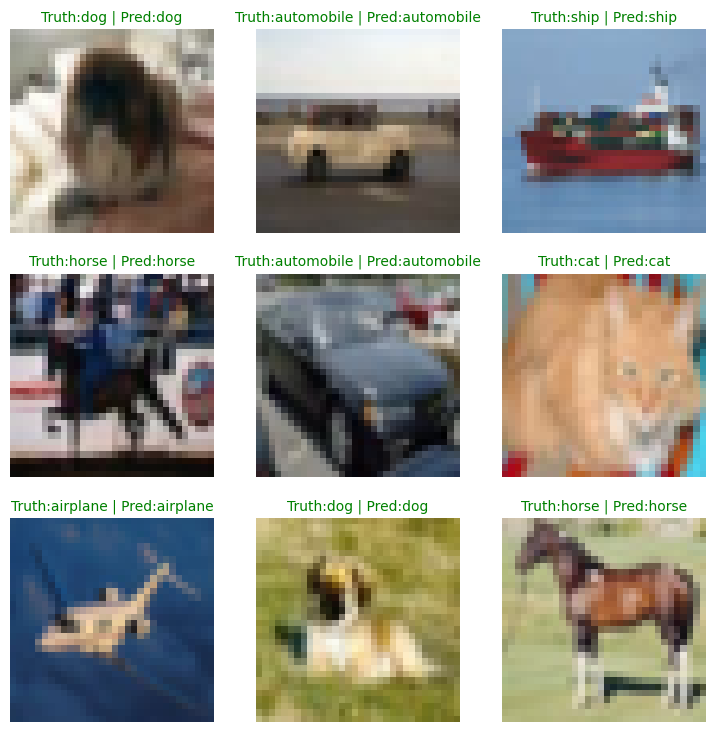

In [47]:
show_image(image_data= X[199:209], class_names= y[199:209], class_preds= pred_list[199: 209])

In [48]:
!pip install --upgrade mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 57.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [49]:
target= torch.tensor(test_data.targets)
pred_list= pred_list.squeeze()

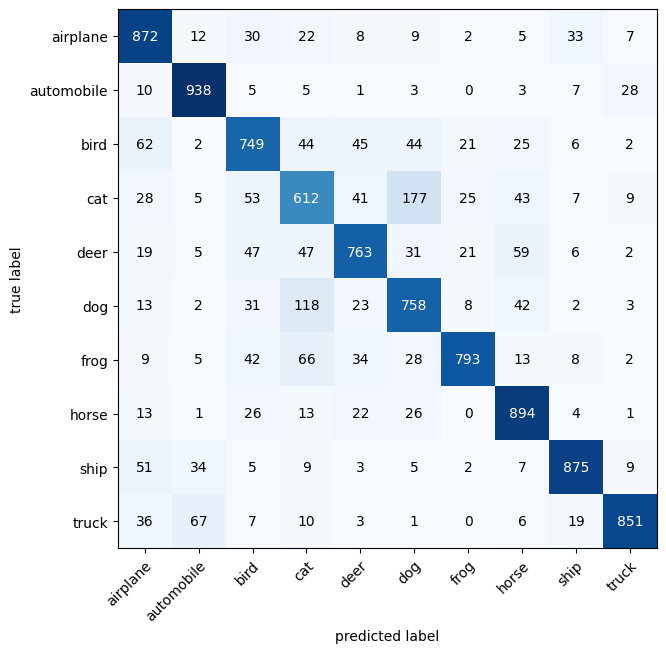

In [50]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix


# setup confusion instance and compare predictions to target
confmat= ConfusionMatrix(num_classes= len(class_names), task= 'multiclass')
conf_tensor= confmat(preds= pred_list, target=target)

# create a graphical representation of the confusion matrix and change tensor to numpy array

fig, ax= plot_confusion_matrix(conf_mat=conf_tensor.numpy(), class_names= class_names, figsize= (10,7) )